In [25]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [26]:
df=pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv")
df

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,14873857,2,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,3,0.61,1,N,48,186,2,4.0,1.0,0.5,0.00,0.00,0.3,5.80
22695,66632549,2,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20
22696,74239933,2,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,1,0.42,1,N,107,234,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30
22697,60217333,2,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [28]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


C:\Users\Admin\AppData\Local\Temp\ipykernel_20996\1141031186.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['trip_distance'])
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='trip_distance', ylabel='Density'>

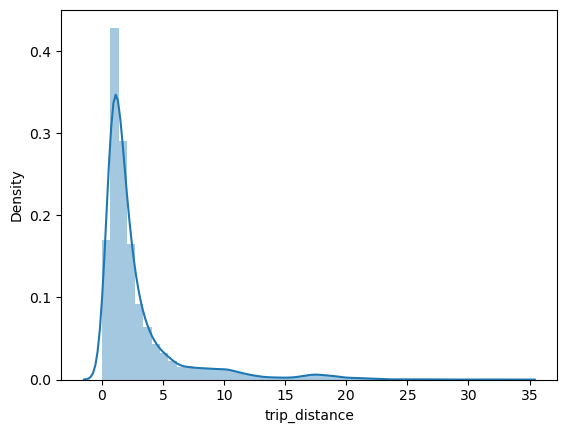

In [29]:
sns.distplot(df['trip_distance'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_20996\131766360.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total_amount'])
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='total_amount', ylabel='Density'>

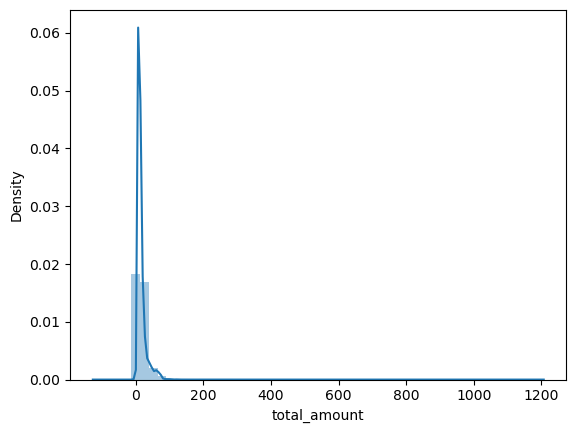

In [30]:
sns.distplot(df['total_amount'])

<Axes: >

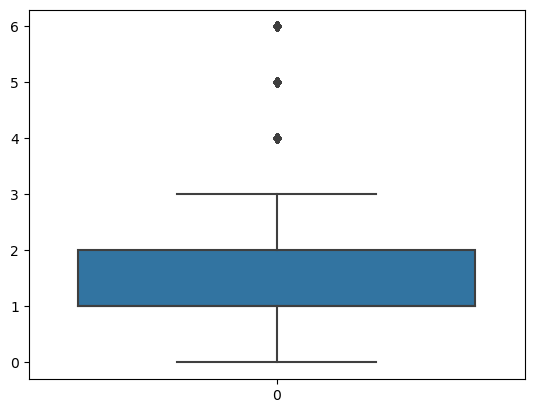

In [31]:
sns.boxplot(df['passenger_count'])

In [32]:
df['pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

df['duration'] = df['dropoff_datetime'] - df['pickup_datetime']

df['duration_in_minutes'] = df['duration'].dt.total_seconds() / 60


In [33]:
df=df[df['duration_in_minutes']>0]

In [34]:
df.drop(columns=['pickup_datetime','dropoff_datetime','duration'],inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_20996\11289404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['pickup_datetime','dropoff_datetime','duration'],inplace=True)


In [35]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration_in_minutes
count,2.267200e+04,22672.000000,22672.000000,22672.000000,22672.000000,22672.000000,22672.000000,22672.000000,22672.000000,22672.000000,22672.000000,22672.000000,22672.000000,22672.000000,22672.000000,22672.000000
mean,5.676335e+07,1.556854,1.642775,2.916531,1.038770,162.394848,161.416020,1.336097,13.020617,0.333120,0.497486,1.837571,0.312914,0.299563,16.306557,17.034787
std,3.274188e+07,0.496768,1.285633,3.653966,0.278857,66.636133,70.098697,0.495800,13.225539,0.463138,0.039211,2.801199,1.400003,0.015555,16.085307,62.030298
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000,0.016667
25%,2.855621e+07,1.000000,1.000000,1.000000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000,6.666667
50%,5.673222e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000,11.183333
75%,8.537523e+07,2.000000,2.000000,3.070000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000,18.383333
max,1.134863e+08,2.000000,6.000000,33.960000,5.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000,1439.550000


In [36]:
df=df[df['total_amount']>0]

In [37]:
df=df.iloc[:,1:]

In [38]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration_in_minutes
0,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56,14.066667
1,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80,26.500000
2,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75,7.200000
3,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69,30.250000
4,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80,16.716667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,2,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,3,0.61,1,N,48,186,2,4.0,1.0,0.5,0.00,0.00,0.3,5.80,3.266667
22695,2,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,40.800000
22696,2,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,1,0.42,1,N,107,234,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30,4.133333
22697,2,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00,11.933333


In [39]:
df.drop(columns=['tpep_pickup_datetime','tpep_dropoff_datetime'],inplace=True)

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration_in_minutes
count,22654.000000,22654.000000,22654.000000,22654.000000,22654.000000,22654.000000,22654.000000,22654.00000,22654.000000,22654.000000,22654.000000,22654.000000,22654.000000,22654.000000,22654.000000
mean,1.556502,1.642800,2.918377,1.038625,162.386334,161.428004,1.334775,13.03818,0.333628,0.498168,1.839031,0.313162,0.299987,16.327445,16.983750
std,0.496808,1.285521,3.654557,0.277721,66.627770,70.100232,0.492878,13.19426,0.462873,0.030210,2.801833,1.400532,0.001993,16.056808,61.373570
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,0.016667
25%,1.000000,1.000000,1.000000,1.000000,114.000000,112.000000,1.000000,6.50000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000,6.683333
50%,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.50000,0.000000,0.500000,1.360000,0.000000,0.300000,11.800000,11.200000
75%,2.000000,2.000000,3.070000,1.000000,233.000000,233.000000,2.000000,14.50000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000,18.400000
max,2.000000,6.000000,33.960000,5.000000,265.000000,265.000000,4.000000,999.99000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000,1439.550000


In [41]:
X_train,X_test,y_train,y_test=train_test_split(df.drop(columns=['fare_amount']),df['fare_amount'],test_size=0.2,random_state=42)

In [42]:
label_encoder = LabelEncoder()

In [43]:
X_train['store_and_fwd_flag']=label_encoder.fit_transform(X_train['store_and_fwd_flag'])
X_test['store_and_fwd_flag']=label_encoder.fit_transform(X_test['store_and_fwd_flag'])

In [44]:
X_train

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration_in_minutes
8969,2,1,0.72,1,0,237,237,2,0.5,0.5,0.00,0.0,0.3,5.80,2.716667
15344,2,1,0.53,1,0,249,249,1,0.5,0.5,1.32,0.0,0.3,6.62,2.650000
8844,1,1,0.60,1,0,239,143,1,1.0,0.5,1.00,0.0,0.3,8.30,5.383333
13229,1,1,4.70,1,0,79,181,1,0.5,0.5,2.90,0.0,0.3,22.20,21.166667
15600,2,1,4.12,1,0,144,261,1,0.5,0.5,3.66,0.0,0.3,21.96,19.733333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11988,2,2,0.75,1,0,161,170,1,0.5,0.5,1.50,0.0,0.3,9.80,9.150000
21615,2,1,1.44,1,0,233,100,2,0.0,0.5,0.00,0.0,0.3,8.30,8.483333
5401,1,3,1.80,1,0,148,249,1,0.5,0.5,1.00,0.0,0.3,12.80,14.000000
863,2,4,0.75,1,0,142,50,1,0.0,0.5,0.50,0.0,0.3,6.30,4.433333


In [46]:
LR=LinearRegression()


In [47]:
LR.fit(X_train,y_train)

LinearRegression()

In [48]:
y_predict=LR.predict(X_test)

In [50]:
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:',mse)
print('R-squared:',r2)

Mean Absolute Error: 0.014416337661316617
Mean Squared Error: 0.02732284226758447
R-squared: 0.9997622197770332
